In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("withbadges.csv", header=None, names=['userid', 'cluster', "distance_from_cluster_center", 'reputation', 'views', 'upvotes', 'downVotes', 'age', 'post_count', 'comment_count', 'badges'])

In [4]:
data.head()

,userid,cluster,distance_from_cluster_center,reputation,views,upvotes,downVotes,age,post_count,comment_count,badges
0,231,3,10.635832,3781,175,167,3,32,39,22,"WrappedArray(Nice Question, Popular Question, ..."
1,431,3,10.263900,2733,319,233,1,34,82,53,"WrappedArray(Famous Question, Nice Answer, Pop..."
2,631,3,20.745303,7050,551,690,3,36,81,86,"WrappedArray(Quorum, Good Answer, Nice Answer,..."
3,1031,3,9.272470,1771,212,100,4,43,8,9,"WrappedArray(Popular Question, Popular Questio..."
4,1231,3,17.605089,3738,537,427,20,38,48,137,"WrappedArray(Popular Question, Notable Questio..."


In [5]:
data['cluster'].value_counts()#head(5).reset_index(drop=True)#.sort_values('score').head(5)

4    178334
3     88156
1     45437
2      4006
0       155
dtype: int64

In [6]:
result = data.sort(['distance_from_cluster_center']).groupby("cluster").head(5)
result

userid  cluster  distance_from_cluster_center  reputation  \
cluster                                                                      
4       175517  2656341        4                      0.337365           4   
        186274  2147548        4                      0.337368           1   
        173897  2698740        4                      0.337368           1   
        144342  3157521        4                      0.337369           1   
        150353  2761125        4                      0.337370          16   
1       178198  1680543        1                      0.736206          31   
        169760   717938        1                      0.736270           9   
        195881  2659954        1                      0.736311         101   
        300852   717621        1                      0.736311           1   
        244634  2502385        1                      0.736576          24   
3       54391    811865        3                      2.040125         668   
        259370   265195        3                      2.047090         800   
        229213    89376        3                      2.051683         331   
        33438    195652        3                      2.058268         789   
        6432     244835        3                      2.068376         997   
2       147484    60724        2                     12.851164       13787   
        174224   187141        2                     13.281399       17861   
        194586   111554        2                     14.724181       19873   
        300636   344821        2                     14.732040       13619   
        240125    10583        2                     15.155254       16372   
0       157071   673730        0                    244.715603      121623   
        20902    572644        0                    354.744168       82334   
        60705    734069        0                    365.405488      122434   
        186749   104349        0                    380.083560      164783   
        63785    426671        0                    381.462101       94511   

                views  upvotes  downVotes  age  post_count  comment_count  \
cluster                                                                     
4       175517      2        0          0   27           1              2   
        186274      5        0          0   27           1              2   
        173897      4        0          0   27           1              2   
        144342      3        0          0   27           1              2   
        150353      0        0          0   27           1              1   
1       178198      2        0          0   44           4              0   
        169760      2        0          0   44           2              3   
        195881      1        0          0   44           1              1   
        300852      0        0          0   44           2              5   
        244634      1        0          0   44           1              1   
3       54391      39      132          4   29          33             60   
        259370     54       83          0   30          28             44   
        229213     79       95          2   29          14             59   
        33438     206      183          5   29          14             90   
        6432      167      161          0   28          26             16   
2       147484    993     1770        151   29         431            733   
        174224   1663     1421         58   38         513           1048   
        194586   1135     1918         79   35         538            852   
        300636    776     1671        119   25         353            785   
        240125   1403     1768         97   30         506            958   
0       157071  10525     3234       1336   26        3722           7294   
        20902    6904     4486       1733   30        2680           7915   
        60705   10973     2136       1473   37        2516    

In [7]:
result.to_csv("Final_result.csv")

In [8]:
x = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y = [275249.858128, 253781.28563, 231894.757772, 201356.552498, 194643.423014, 174904.775614, 164926.081325, 158890.272823, 151865.858838, 147402.320886]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

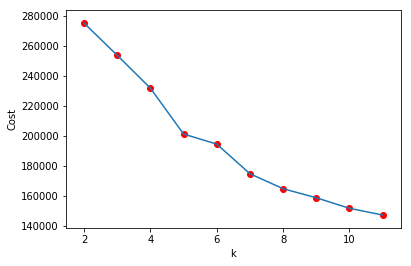

In [10]:
plt.plot(x, y)
plt.scatter(x, y, c='r', marker='o')
plt.xlabel("k")
plt.ylabel("Cost")

In [11]:
data_mlib = pd.read_csv("output_mlibcsv", header=None, names=['cluster', 'userid'])

In [12]:
data_mlib.head()

,cluster,userid
0,2,231
1,2,431
2,2,631
3,2,1031
4,2,1231


In [29]:
reultswithmlib = pd.merge(result, data_mlib, on=['userid'], how='inner', suffixes=['', '_mlib'])

In [30]:
reultswithmlib.to_csv("Final_result_withmlib.csv")